In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
import scipy.stats as stats

%matplotlib inline


###  1.Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [ ]:
cust=pd.read_csv("C:/Users/ACER/Desktop/Analytixlabs/Python/Manuj_Sir_python/Assignment/5. Pandas Case Study 3 - Insurance Claims Case Study/cust_demographics.csv")
claim=pd.read_csv("C:/Users/ACER/Desktop/Analytixlabs/Python/Manuj_Sir_python/Assignment/5. Pandas Case Study 3 - Insurance Claims Case Study/claims.csv")

In [3]:
insurance=pd.merge(left=cust,right=claim,left_on='CUST_ID',right_on='customer_id',how='left',indicator=True)
insurance.drop(columns='customer_id',inplace=True)
insurance.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,_merge
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,both
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,both


In [4]:
insurance.isnull().sum()

CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                7
incident_cause          7
claim_date              7
claim_area              7
police_report           7
claim_type              7
claim_amount           72
total_policy_claims    17
fraudulent              7
_merge                  0
dtype: int64

In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1092 entries, 0 to 1091
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   CUST_ID              1092 non-null   int64   
 1   gender               1092 non-null   object  
 2   DateOfBirth          1092 non-null   object  
 3   State                1092 non-null   object  
 4   Contact              1092 non-null   object  
 5   Segment              1092 non-null   object  
 6   claim_id             1085 non-null   float64 
 7   incident_cause       1085 non-null   object  
 8   claim_date           1085 non-null   object  
 9   claim_area           1085 non-null   object  
 10  police_report        1085 non-null   object  
 11  claim_type           1085 non-null   object  
 12  claim_amount         1020 non-null   object  
 13  total_policy_claims  1075 non-null   float64 
 14  fraudulent           1085 non-null   object  
 15  _merge               

### 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance

In [6]:
insurance['DateOfBirth']=pd.to_datetime(insurance.DateOfBirth,format='%d-%b-%y')
insurance['claim_date']=pd.to_datetime(insurance.claim_date)

In [7]:
insurance.DateOfBirth.loc[insurance.DateOfBirth.dt.year>2020]=insurance.DateOfBirth.loc[insurance.DateOfBirth.dt.year>2020] + pd.DateOffset(years=-100)

C:\Users\ACER\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
#converting Cust_id and claim_id to object
insurance[['CUST_ID','claim_id']]=insurance[['CUST_ID','claim_id']].applymap(str)

In [9]:
#converting contact details to proper format
insurance['Contact']=insurance['Contact'].str.replace('-','')

### 3.Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign

In [10]:
insurance['claim_amount']=pd.to_numeric(insurance.claim_amount.str.replace('$',''))

### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims

In [11]:
insurance['Alert']=np.where((insurance.claim_type=='Injury only')&((insurance.police_report=='No')|(insurance.police_report=='Unknown') ),0,1)

In [12]:
insurance.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,_merge,Alert
0,21868593,Female,1979-01-12,VT,7899168172,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,both,1
1,75740424,Female,1970-01-13,ME,2655431264,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,both,1


### 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique.Retain the most recent observation and delete any duplicated records inthe data based on the customer ID column

In [13]:
insurance.CUST_ID.loc[insurance.CUST_ID.duplicated()]

3      30308357
5      47830476
7      19269962
9      21831191
625    84147585
627    85357756
629    53539195
Name: CUST_ID, dtype: object

In [14]:
insurance=insurance.groupby(by='CUST_ID').first().reset_index()

### 6.Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [15]:
insurance.isnull().sum()

CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                0
incident_cause          7
claim_date              7
claim_area              7
police_report           7
claim_type              7
claim_amount           72
total_policy_claims    17
fraudulent              7
_merge                  0
Alert                   0
dtype: int64

In [16]:
insurance[['claim_amount','total_policy_claims']]=insurance.select_dtypes(['float','int64']).fillna(insurance.select_dtypes(['float','int64']).mean().round(0))

In [17]:
cat=insurance.select_dtypes(['object']).columns

In [18]:
for i in cat:
    insurance[i]=insurance[i].fillna(insurance[i].mode()[0])
insurance.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,_merge,Alert
0,10149231,Female,1992-03-22,FL,2919423485,Platinum,77526829.0,Other causes,2018-04-24,Auto,Unknown,Material and injury,34780.0,3.0,No,both,1
1,10198314,Female,1980-11-10,WI,1768611936,Platinum,50022306.0,Other causes,2018-05-01,Auto,Unknown,Injury only,28658.0,1.0,Yes,both,0


### 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria Children < 18 Youth 18-30 Adult 30-60 Senior > 60

In [19]:
today=datetime.datetime.today().date()
insurance['Age']=insurance.claim_date.dt.year-insurance.DateOfBirth.dt.year

In [20]:
insurance['Criteria']=pd.cut(insurance['Age'],bins=[1,17,30,60,120],labels=['Children','Youth','Adult','Senior'],include_lowest=False)

In [21]:
#filling the missing age and criteria
insurance['Age']=insurance['Age'].fillna(round(insurance['Age'].mean(),0))
insurance['Criteria']=insurance['Criteria'].fillna('Adult')

### 8. What is the average amount claimed by the customers from various segments?

In [22]:
insurance.groupby(by='Segment').claim_amount.mean()

Segment
Gold        12755.680108
Platinum    12370.114011
Silver      12271.118911
Name: claim_amount, dtype: float64

### 9.What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [23]:
insurance_2=insurance.loc[insurance.claim_date<='2018-09-10']
insurance_2.groupby(by='incident_cause').claim_amount.sum().round(0).reset_index()

,incident_cause,claim_amount
0,Crime,724460.0
1,Driver error,3264280.0
2,Natural causes,1312702.0
3,Other causes,3725029.0
4,Other driver error,3318800.0


### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [24]:
insurance.incident_cause.unique()

array(['Other causes', 'Natural causes', 'Other driver error', 'Crime',
       'Driver error'], dtype=object)

In [25]:
insurance.loc[((insurance.State=='AK')|(insurance.State=='DE')|(insurance.State=='TX')) &
             ( (insurance.incident_cause=='Other driver error')|(insurance.incident_cause=='Driver error'))].groupby(by='State').CUST_ID.count()

State
AK    10
DE    15
TX    10
Name: CUST_ID, dtype: int64

### 11.Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [26]:
k=insurance.pivot_table(index='gender',columns='Segment',values='claim_amount',aggfunc='sum')
k

Segment,Gold,Platinum,Silver
gender,,,
Female,2122229.0,2381970.0,1935962.0
Male,2622884.0,2120751.5,2346658.5


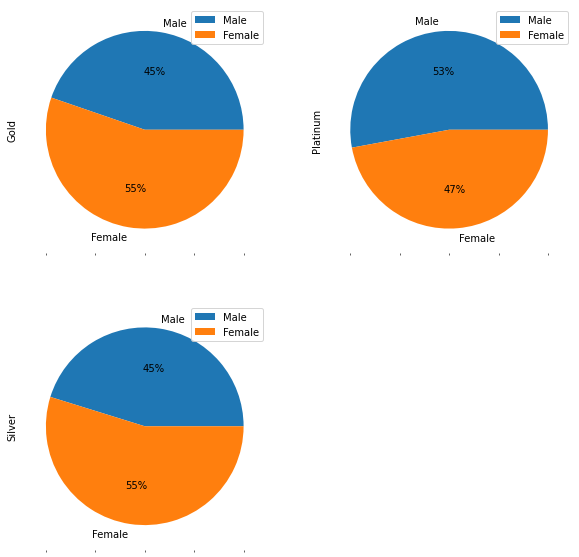

In [27]:
k.plot(kind='pie',autopct='%1.0f%%',subplots=True,labels=['Male','Female'],fontsize=10,layout=(2,2),figsize=(10,10))
plt.show()

### 12.Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

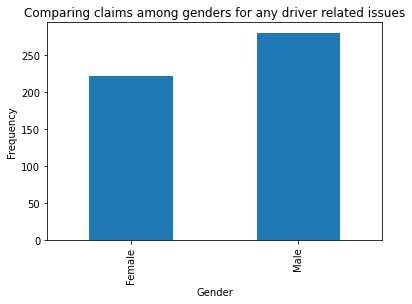

In [28]:
insurance.loc[insurance.incident_cause.str.lower().str.contains('driver')].groupby(by='gender').incident_cause.count().plot(kind='bar')
plt.title('Comparing claims among genders for any driver related issues')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

### 13.Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

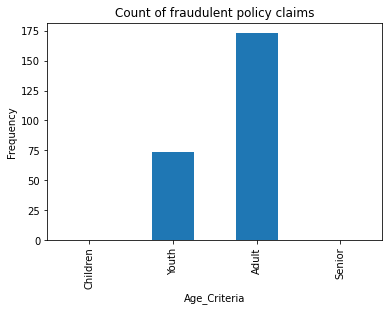

In [29]:
insurance.loc[insurance.fraudulent=='Yes'].groupby(by='Criteria').fraudulent.count().plot(kind='bar')
plt.title('Count of fraudulent policy claims')
plt.xlabel('Age_Criteria')
plt.ylabel('Frequency')
plt.show()

### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order

In [30]:
insurance_3=insurance.set_index('claim_date')

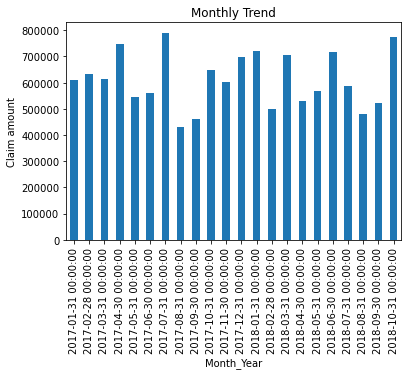

In [31]:
insurance_3.resample('M').claim_amount.sum().round(0).plot(kind='bar')
plt.title('Monthly Trend')
plt.xlabel('Month_Year')
plt.ylabel('Claim amount')
plt.show()

### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims

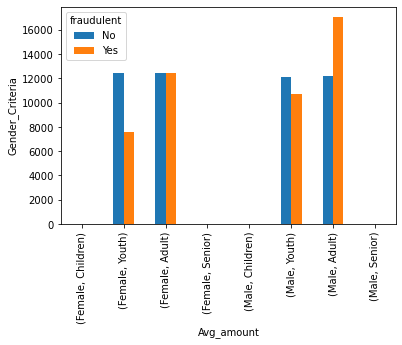

In [32]:
avg_claim=insurance.groupby(by=['fraudulent','gender','Criteria']).claim_amount.mean()
avg_claim.unstack(level=0).plot(kind='bar')
plt.xlabel('Avg_amount')
plt.ylabel('Gender_Criteria')
plt.show()

### 16.Is there any similarity in the amount claimed by males and females?

In [40]:
male=insurance.loc[insurance.gender=='Male','claim_amount']
female=insurance.loc[insurance.gender=='Female','claim_amount']
print('Avg amount claimed by males:',round(male.mean(),2),'|','Avg amount claimed by females:',round(female.mean(),2))

Avg amount claimed by males: 12821.51 | Avg amount claimed by females: 12105.57


In [43]:
#two sample ind t-test
print('P_value:',stats.ttest_ind( male, female)[1])

P_value: 0.37645173212362204


In [45]:
# ANOVA
print('P_value:',stats.f_oneway( male, female)[1])

P_value: 0.37645173212347394


### Conclusion:
P_value is greater than 0.05.So,we failed to reject null hypothesis

Hence there is no difference in the amount claimed by males and females

### 17. Is there any relationship between age category and segment?¶

In [48]:
print('P_vales:',stats.chi2_contingency(pd.crosstab(insurance.Segment,insurance.Criteria))[1])

P_vales: 0.716359436476942


### Conclusion:
P_value is greater than 0.05.So,we failed to reject null hypothesis

Hence there is no No relation between age category and Segment

### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [51]:
insurance.claim_amount.mean()

12470.465437788018

In [53]:
print('P_value:',stats.ttest_1samp(insurance.claim_amount,10000)[1])

P_value: 1.4028863854355503e-09


### Conclusion:
P_value is less than 0.05.So,we reject null hypothesis

Hence there is a significant rise in claim amounts as compared to 2016-17 hypothesised value

### 19. Is there any difference between age groups and insurance claims?

In [55]:
insurance.Criteria.unique()

[Youth, Adult]
Categories (2, object): [Youth < Adult]

In [59]:
youth=insurance.loc[insurance.Criteria=='Youth','total_policy_claims']
adult=insurance.loc[insurance.Criteria=='Adult','total_policy_claims']
print('Mean of youth:',round(youth.mean(),2),'|','Mean of Adult:',round(adult.mean(),2))
print('Var in youth:',round(youth.var(),2),'|','Var of Adult:',round(adult.var(),2))

Mean of youth: 1.62 | Mean of Adult: 1.57
Var in youth: 1.56 | Var of Adult: 1.15


In [60]:
print('P_value:',stats.f_oneway( youth,adult )[1])

P_value: 0.51075546045695


### Conclusion:
P_value is greater than 0.05.So,we failed to reject null hypothesis

Hence both age group and insurance claims are similar

### 20. Is there any relationship between total number of policy claims and the claimed amount?

In [ ]:
Ho: No relationship
Ha: Realted variables
CI=95% ,P-vlaue=0.05
Test: pearson correlation

In [61]:
insurance.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,_merge,Alert,Age,Criteria
0,10149231,Female,1992-03-22,FL,2919423485,Platinum,77526829.0,Other causes,2018-04-24,Auto,Unknown,Material and injury,34780.0,3.0,No,both,1,26.0,Youth
1,10198314,Female,1980-11-10,WI,1768611936,Platinum,50022306.0,Other causes,2018-05-01,Auto,Unknown,Injury only,28658.0,1.0,Yes,both,0,38.0,Adult


In [62]:
stats.pearsonr(insurance.total_policy_claims,insurance.claim_amount)

(-0.013898127368510491, 0.6474629691338404)

### Conclusion:
Both the variables are highly corelated